In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import gc
import cv2

In [4]:
digits = pd.read_csv("mnist_train.csv")
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
digits.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
four = digits.iloc[3, 1:]
four.shape

(784,)

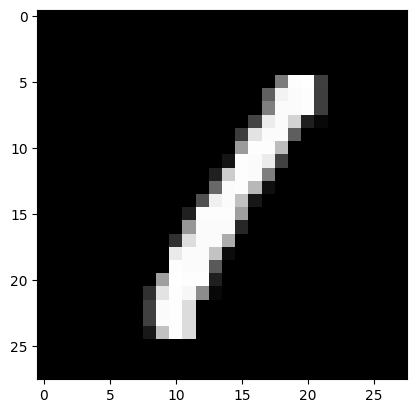

In [7]:
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray')

In [8]:
print(four[5:-5, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0]
 [  0   0   0   0   0   0   0   0   0   0   0  68 236 251 211  31   8   0]
 [  0   0   0   0   0   0   0   0   0   0  60 228 251 251  94   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 155 253 253 189   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20 253 251 235  66   0   0   0   0]
 [  0   0   0   0   0   0   0   0  32 205 253 251 126   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 104 251 253 184  15   0   0   0   0   0]
 [  0   0   0   0   0   0   0  80 240 251 193  23   0   0   0   0   0   0]
 [  0   0   0   0   0   0  32 253 253 253 159   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 151 251 251 251  39   0   0   0   0   0   0   0]
 [  0   0   0   0   0  48 221 251 251 172   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 234

In [9]:
digits.label.value_counts()


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

In [10]:
100*(round(digits.label.astype('category').value_counts()/len(digits.index), 4))


1    11.24
7    10.44
3    10.22
2     9.93
9     9.92
0     9.87
6     9.86
8     9.75
4     9.74
5     9.04
Name: label, dtype: float64

In [11]:
digits.isnull().sum()


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [12]:
description = digits.describe()
description

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [14]:
# Creating training and test sets
# Splitting the data into train and test
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6000, 784)
(54000, 784)
(6000,)
(54000,)


In [15]:
from sklearn import svm
from sklearn import metrics

# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear')

# fit
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [16]:
predictions = svm_linear.predict(x_test)
predictions[:10]

array([7, 4, 9, 6, 1, 1, 8, 0, 3, 2])

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion


In [20]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)


0.9089814814814815

In [17]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5335
           1       0.93      0.98      0.95      6047
           2       0.88      0.91      0.90      5352
           3       0.88      0.87      0.87      5514
           4       0.90      0.92      0.91      5266
           5       0.88      0.85      0.86      4875
           6       0.95      0.95      0.95      5331
           7       0.94      0.91      0.92      5659
           8       0.92      0.84      0.88      5264
           9       0.89      0.89      0.89      5357

    accuracy                           0.91     54000
   macro avg       0.91      0.91      0.91     54000
weighted avg       0.91      0.91      0.91     54000



In [19]:
gc.collect()


0